분석할 때 순서
1. 데이터 전처리 단계
2. 감성 분석
3. 주요 주제 추출
4. 문장 및 키워드 분석
5. 유사 리뷰 군집화
6. 워드 클라우드
7. 데이터 시각화
8. 결과 요약 및 인사이트 도출

1. 특수문자 제거
2. 불용어 제거
3. 어간 추출 및 표제어 추출
4. 소문자화

- 감정 단어 리스트(예: 긍정어와 부정어)를 추가하여 Review 열에서 해당 단어를 파악하는 방법이 효과적

In [5]:
# !pip install wordcloud matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from konlpy.tag import Okt
from wordcloud import WordCloud

In [6]:
data = pd.read_csv('./data/한강수_reviews_추천순.csv')

In [7]:
data

,Index,Date,Review
0,1,2024년 10월 8일 화요일,동네 친구들이랑 한잔하러 왔어요\n주차하기 편하고 고기 질 좋고 가성비 좋아요😊😊
1,2,2024년 7월 31일 수요일,강남 뱅뱅매장 뒤편에 위치해있습미당~\n고기집으로 퀄리티가 좋고 맛도 좋아용\n점심...
2,3,2024년 10월 12일 토요일,"모두 친철하시고, 고기질 뿐만 아니라 반찬하나하나까지 너무 맛있어요~👍🏻"
3,4,2024년 10월 29일 화요일,굿
4,5,2024년 9월 6일 금요일,굿
...,...,...,...
99,100,2019년 8월 9일 금요일,너므친절하시고 살치살 맛잇어용
100,101,2019년 6월 27일 목요일,등심 맛있어요 단체 회식으로 먹었지만 모두 만족했습니다~
101,102,2019년 6월 4일 화요일,이제 오픈한 집이라 깨끗하고 고기의 질도 매우 좋았습니다! 번창하세요!
102,103,2019년 2월 1일 금요일,육회비빕밥 시키면 국도 한그릇 같이 나와유 존맛탱


In [8]:
data = data.drop(['Index'], axis=1)

In [9]:
data

,Date,Review
0,2024년 10월 8일 화요일,동네 친구들이랑 한잔하러 왔어요\n주차하기 편하고 고기 질 좋고 가성비 좋아요😊😊
1,2024년 7월 31일 수요일,강남 뱅뱅매장 뒤편에 위치해있습미당~\n고기집으로 퀄리티가 좋고 맛도 좋아용\n점심...
2,2024년 10월 12일 토요일,"모두 친철하시고, 고기질 뿐만 아니라 반찬하나하나까지 너무 맛있어요~👍🏻"
3,2024년 10월 29일 화요일,굿
4,2024년 9월 6일 금요일,굿
...,...,...
99,2019년 8월 9일 금요일,너므친절하시고 살치살 맛잇어용
100,2019년 6월 27일 목요일,등심 맛있어요 단체 회식으로 먹었지만 모두 만족했습니다~
101,2019년 6월 4일 화요일,이제 오픈한 집이라 깨끗하고 고기의 질도 매우 좋았습니다! 번창하세요!
102,2019년 2월 1일 금요일,육회비빕밥 시키면 국도 한그릇 같이 나와유 존맛탱


# 특수문자 제거

In [14]:
# 특수 문자 제거 함수 수정: '\n'도 제거하도록 업데이트
def clean_special_characters(text):
    return re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text.replace('\n', ' '))

# 'Review' 열에 수정된 특수 문자 제거 함수 적용
data['Cleaned_Review'] = data['Review'].apply(clean_special_characters)

# 불용어 제거 함수 적용
data['No_Stopwords_Review'] = data['Cleaned_Review'].apply(remove_stopwords)

# 결과 확인
print(data[['Cleaned_Review', 'No_Stopwords_Review']].head())


                                      Cleaned_Review  \
0         동네 친구들이랑 한잔하러 왔어요 주차하기 편하고 고기 질 좋고 가성비 좋아요   
1  강남 뱅뱅매장 뒤편에 위치해있습미당 고기집으로 퀄리티가 좋고 맛도 좋아용 점심메뉴 ...   
2               모두 친철하시고 고기질 뿐만 아니라 반찬하나하나까지 너무 맛있어요   
3                                                  굿   
4                                                  굿   

                                 No_Stopwords_Review  
0         동네 친구들이랑 한잔하러 왔어요 주차하기 편하고 고기 질 좋고 가성비 좋아요  
1  강남 뱅뱅매장 뒤편에 위치해있습미당 고기집으로 퀄리티가 좋고 맛도 좋아용 점심메뉴 ...  
2                  모두 친철하시고 고기질 뿐만 아니라 반찬하나하나까지 맛있어요  
3                                                  굿  
4                                                  굿  


# 불용어 제거

In [11]:
# 새로운 불용어 리스트 정의
stopwords = [
    "을", "를", "이", "가", "은", "는", "에", "의", "으로", "와", "과", "고", "도", "부터", "까지", 
    "에서", "한테", "에게", "도", "만", "마저", "조차", "처럼", "듯이", "하고", "하여", "했으며", 
    "하다", "였다", "되다", "있다", "그리고", "그러나", "하지만", "그러므로", "따라서", "그런데", 
    "또한", "또", "그러면", "아니면", "아주", "매우", "정말", "너무", "아마", "약간", "조금", 
    "대체로", "대부분", "다소", "한", "이미", "현재", "원래", "싶다", "같다", "보다", "이런", 
    "저런", "그런", "어떤", "모든", "각", "이", "그", "저", "와", "우와", "오", "아", "어", 
    "오오", "아아", "오늘", "어제", "내일", "요즘", "최근", "항상", "자주", "가끔", "언제", 
    "종종", "매일", "이번", "다음", "이전", "것", "수", "분", "때문", "같이", "위해", "중", 
    "후", "전", "등등", "그것", "이것", "저것", "여기", "저기", "거기", "그곳", "이곳", "저쪽",
    "곧", "잠시", "금방", "바로", "지금", "당장", "방금", "아직", "언젠가", "절대", "전혀", 
    "어쩌면", "결국", "종종", "이다", "아니다", "있다", "없다", "위해", "때", "경우", "듯", 
    "게", "걸", "며", "니", "듯", "탓", "만큼", "따름"
]


# 불용어 제거 함수 정의
def remove_stopwords(text):
    # 텍스트를 공백을 기준으로 나눈 후, stopwords에 포함되지 않은 단어들만 다시 결합
    return ' '.join([word for word in text.split() if word not in stopwords])

# 'Cleaned_Review' 열에 불용어 제거 함수 적용
data['No_Stopwords_Review'] = data['Cleaned_Review'].apply(remove_stopwords)

# 결과 확인
print(data[['Cleaned_Review', 'No_Stopwords_Review']].head())


                                      Cleaned_Review  \
0        동네 친구들이랑 한잔하러 왔어요\n주차하기 편하고 고기 질 좋고 가성비 좋아요   
1  강남 뱅뱅매장 뒤편에 위치해있습미당\n고기집으로 퀄리티가 좋고 맛도 좋아용\n점심메...   
2               모두 친철하시고 고기질 뿐만 아니라 반찬하나하나까지 너무 맛있어요   
3                                                  굿   
4                                                  굿   

                                 No_Stopwords_Review  
0         동네 친구들이랑 한잔하러 왔어요 주차하기 편하고 고기 질 좋고 가성비 좋아요  
1  강남 뱅뱅매장 뒤편에 위치해있습미당 고기집으로 퀄리티가 좋고 맛도 좋아용 점심메뉴 ...  
2                  모두 친철하시고 고기질 뿐만 아니라 반찬하나하나까지 맛있어요  
3                                                  굿  
4                                                  굿  


# 어간 추출 및 표제어 추출

1. Mecab
2. Komoran
3. Kkma (꼬꼬마)
4. Hannanum (한나눔)
5. Eunjeon (은전한닢)
6. KoNLPy 라이브러리
7. 품사 태깅 및 딥러닝 기반 형태소 분석기

추천 분석기 비교 요약:
- Mecab: 속도와 정확도에서 우수하여 대규모 데이터 처리에 추천.
- Komoran: 안정적인 품사 태깅, 빠른 속도로 적당한 분석기.
- Kkma: 구체적인 구문 분석이 필요할 때 유용하지만 속도가 느림.
- Hannanum: 다양한 분석을 지원하지만 속도 면에서 느릴 수 있음.
- 딥러닝 모델 (KoBERT 등): 문맥을 이해한 고차원적인 분석을 수행할 때 사용, 그러나 형태소 분석에는 과할 수 있음.

상황에 따른 추천:
- 속도와 대량 데이터 처리가 중요하다면: Mecab 추천.
- 정확한 품사 태깅과 안정성이 필요하다면: Komoran 추천.
- 복잡한 문장 구조를 분석해야 한다면: Kkma 추천.
- 딥러닝 기반의 문맥적 분석을 원한다면: KoBERT 또는 트랜스포머 기반 접근법을 고려.

In [11]:
okt = Okt()

def extract_lemmatized_text(text):
    tokens = okt.morphs(text, stem=True)
    return ' '.join(tokens)

data['Lemmatized_Review'] = data['No_Stopwords_Review'].apply(extract_lemmatized_text)

In [12]:
print(data[['No_Stopwords_Review', 'Lemmatized_review']].head())

                                 No_Stopwords_Review  \
0         동네 친구들이랑 한잔하러 왔어요 주차하기 편하고 고기 질 좋고 가성비 좋아요   
1  강남 뱅뱅매장 뒤편에 위치해있습미당 고기집으로 퀄리티가 좋고 맛도 좋아용 점심메뉴 ...   
2                  모두 친철하시고 고기질 뿐만 아니라 반찬하나하나까지 맛있어요   
3                                                  굿   
4                                                  굿   

                                   Lemmatized_review  
0      동네 친구 들 이랑 한잔 하다 오다 주차 하다 편하다 고기 질 좋다 가성 비 좋다  
1  강남 뱅뱅 매장 뒤편 에 위치 하다 습 미당 고 기 집 으로 퀄리티 가 좋다 맛 도...  
2             모두 친철 하다 고 기질 뿐 만 아니다 반찬 하 나 하나 까지 맛있다  
3                                                  굿  
4                                                  굿  


머신러닝이나 딥러닝 기반의 감성분석

In [12]:
# pip install --upgrade transformers torch

In [27]:
# rm -rf ~/.cache/huggingface/transformers

In [26]:
# !pip install torch==2.4.1 torchvision==0.19.1+cu118 torchaudio==2.4.1+cu118

In [29]:
!pip install onnxruntime==1.8.0


ERROR: Could not find a version that satisfies the requirement onnxruntime==1.8.0 (from versions: 1.12.0, 1.12.1, 1.13.1, 1.14.0, 1.14.1, 1.15.0, 1.15.1, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.17.0, 1.17.1, 1.17.3, 1.18.0, 1.18.1, 1.19.0, 1.19.2, 1.20.0)
ERROR: No matching distribution found for onnxruntime==1.8.0


In [32]:
!pip install git+https://github.com/SKTBrain/KoBERT.git@master --no-deps


  Cloning https://github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-4wfbwfdi
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-req-build-4wfbwfdi
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 5c46b1c68e4755b54879431bd302db621f4d2f47
  Preparing metadata (setup.py) ... done
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15694 sha256=e07cc5615a602608a44ef8ef3eeba6a3b85b735a0fe2e4a2fcf442c39795d504
  Stored in directory: /tmp/pip-ephem-wheel-cache-qm2jd0ig/wheels/b5/40/8d/6364a6af0bd25ba1b948d18095f59872f16b3d1c1f2faae94a
Successfully built kobert


In [34]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn.functional import softmax

# KcBERT 모델과 토크나이저 로드
model_name = "beomi/kcbert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# 감성 분석 함수 정의
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=-1)
    label = torch.argmax(probs, dim=1).item()
    sentiment = ["부정", "중립", "긍정"][label]
    return sentiment

# 예제 텍스트 분석
data['Sentiment'] = data['Lemmatized_review'].apply(predict_sentiment)

# 결과 확인
print(data[['Lemmatized_review', 'Sentiment']].head())


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                   Lemmatized_review Sentiment
0      동네 친구 들 이랑 한잔 하다 오다 주차 하다 편하다 고기 질 좋다 가성 비 좋다        중립
1  강남 뱅뱅 매장 뒤편 에 위치 하다 습 미당 고 기 집 으로 퀄리티 가 좋다 맛 도...        중립
2             모두 친철 하다 고 기질 뿐 만 아니다 반찬 하 나 하나 까지 맛있다        중립
3                                                  굿        긍정
4                                                  굿        긍정


별로인듯?

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Lemmatized_Review 열의 텍스트 데이터를 CountVectorizer로 분석
vectorizer = CountVectorizer(max_features=1000)  # 최대 상위 1000개의 단어만 고려
X = vectorizer.fit_transform(data['Lemmatized_review'])

# 단어 빈도 데이터프레임 생성
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 단어별 총 빈도 계산
word_counts = word_freq_df.sum().sort_values(ascending=False)

# 상위 빈도 단어 확인
print(word_counts.head(50))  # 상위 20개 단어 출력


맛있다     42
좋다      26
고기      26
하다      23
먹다      20
친절하다    15
굿굿      11
점심      10
있다      10
반찬      10
육회       9
이다       9
사장       9
가성       8
최고       8
으로       7
굽다       7
나오다      7
한우       7
아니다      6
같다       6
메뉴       6
비빔밥      6
모두       6
갈다       6
영양탕      5
에서       5
등심       5
사시미      5
오다       5
진짜       5
보다       5
가다       5
까지       4
자다       4
살다       4
많다       4
밑반찬      4
분들       4
서비스      4
없다       4
다음       4
손님       4
퀄리티      4
직원       4
기질       3
음식       3
강남       3
훌륭하다     3
가격       3
dtype: int64


In [42]:
positive_words = ["맛있다", "좋다", "친절하다", "굿굿", "최고", "훌륭하다", "가성", "퀄리티", "추천"]
negative_words = ["별로", "불만", "실망", "짜증", "없다"]


In [43]:
def adjust_sentiment(text, predicted_label):
    # 텍스트에 긍정 또는 부정 단어가 포함된 경우 예측 결과 보정
    if any(word in text for word in positive_words):
        return "긍정"
    elif any(word in text for word in negative_words):
        return "부정"
    return predicted_label


In [45]:
# 'Sentiment' 열이 기존 모델의 예측 결과
data['Adjusted_Sentiment'] = data.apply(lambda row: adjust_sentiment(row['Lemmatized_review'], row['Sentiment']), axis=1)

# 결과 확인
print(data[['Lemmatized_review', 'Sentiment', 'Adjusted_Sentiment']].head(20))


                                    Lemmatized_review Sentiment  \
0       동네 친구 들 이랑 한잔 하다 오다 주차 하다 편하다 고기 질 좋다 가성 비 좋다        중립   
1   강남 뱅뱅 매장 뒤편 에 위치 하다 습 미당 고 기 집 으로 퀄리티 가 좋다 맛 도...        중립   
2              모두 친철 하다 고 기질 뿐 만 아니다 반찬 하 나 하나 까지 맛있다        중립   
3                                                   굿        긍정   
4                                                   굿        긍정   
5                                맛있다 먹다 점심때 도 손님 이 많다        긍정   
6                  건강하다 점심 맛집 한우 맛집 점심 육회 비빔밥 가성 비 좋다        중립   
7   꺄 철수 전 에 소고기 개이득 밑반찬 도 된장찌개 도 짱 마싯다 한우 도 맛있다 사...        중립   
8                                                  굿굿        긍정   
9   반찬 이 자다 나오다 음식 나오다 때 까지 대기 가 좀 있다 편 손님 들 이 많다 ...        중립   
10                                                 굿굿        긍정   
11                                                 굿굿        긍정   
12                             강남 과 양재 사이 숨기다 가성 비 맛집        긍정   
13                                                  굿        긍

In [47]:
!pip install wordcloud matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


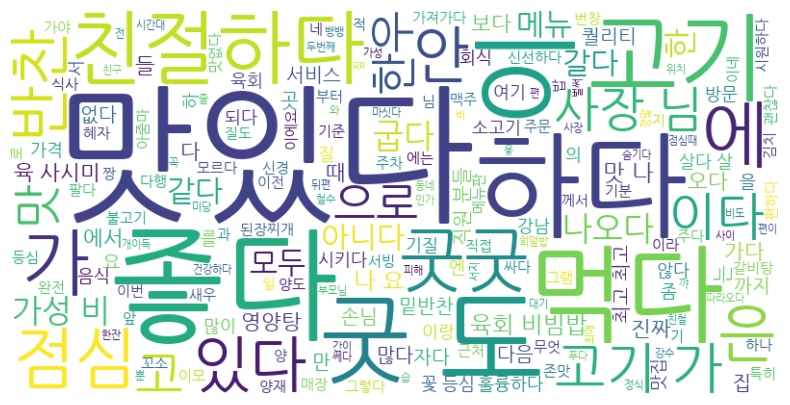

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 텍스트 데이터를 모두 결합하여 하나의 문자열로 만듭니다
text = ' '.join(data['Lemmatized_review'])

# WordCloud 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 나눔고딕 폰트 경로
    width=800,
    height=400,
    background_color='white'
).generate(text)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniforge3/envs/nlp/lib/python3.10/site-packa

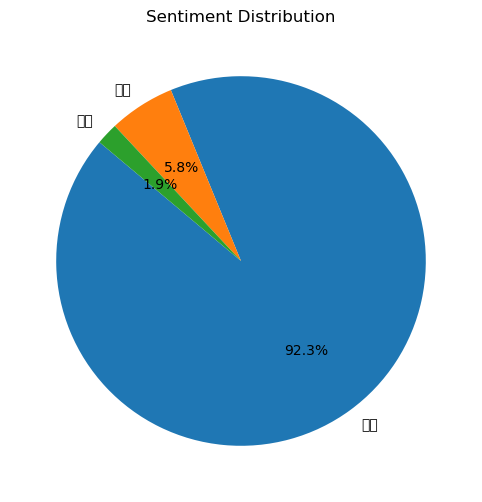

In [58]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로 확인
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)  # matplotlib에 폰트 설정

# 감성 분석 결과 비율 확인
sentiment_counts = data['Adjusted_Sentiment'].value_counts()

# 파이 차트 시각화
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()


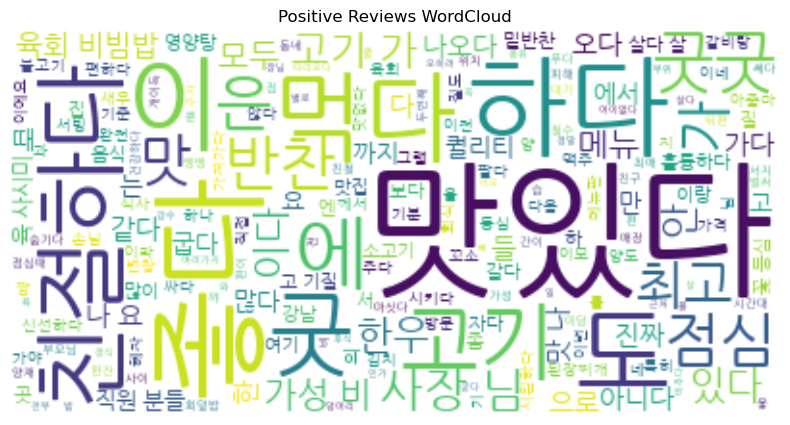

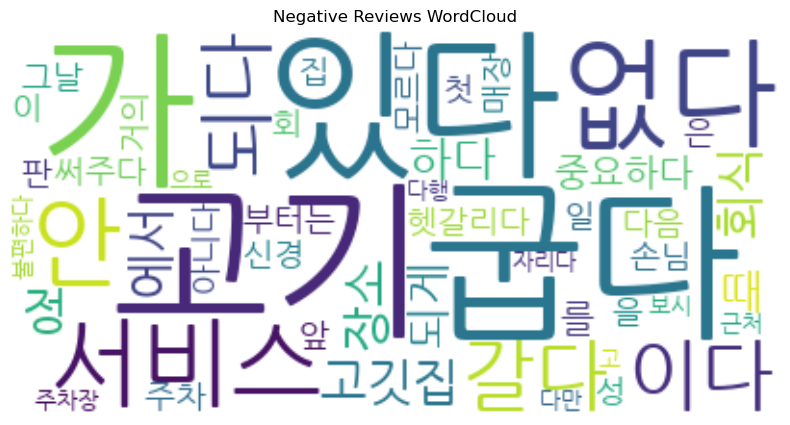

In [57]:
# 긍정 및 부정 리뷰 텍스트 결합
positive_text = ' '.join(data[data['Adjusted_Sentiment'] == '긍정']['Lemmatized_review'])
negative_text = ' '.join(data[data['Adjusted_Sentiment'] == '부정']['Lemmatized_review'])

# 긍정 리뷰 WordCloud
positive_wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()

# 부정 리뷰 WordCloud
negative_wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()


추가적인 통계 분석
각 감성 카테고리별로 **리뷰 길이(단어 수)**를 분석하여 긍정, 부정, 중립 리뷰 간의 차이를 확인할 수 있습니다.
예를 들어, 긍정 리뷰가 부정 리뷰보다 길거나, 중립 리뷰가 간단한 표현으로 이루어져 있는지 확인해 볼 수 있습니다.

In [ ]:
# 리뷰 길이 계산
data['review_length'] = data['Lemmatized_Review'].apply(lambda x: len(x.split()))

# 감성 카테고리별 리뷰 길이의 평균값 계산
print(data.groupby('Adjusted_Sentiment')['review_length'].mean())
